# Titanic Survives

## Import Libararies

In [119]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import accuracy_score

## Read Files

In [120]:
train=pd.read_csv('titanic/train.csv')
test=pd.read_csv('titanic/test.csv')
ss=pd.read_csv('titanic/gender_submission.csv')
ID=test['PassengerId']

## Explore Data Analysis

In [121]:
train.shape

(891, 12)

In [122]:
test.shape

(418, 11)

In [123]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [124]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [125]:
ss.shape

(418, 2)

## Visualzations

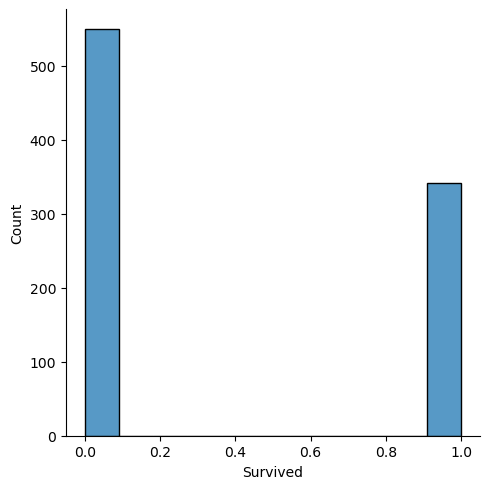

In [126]:
sns.displot(train.Survived)

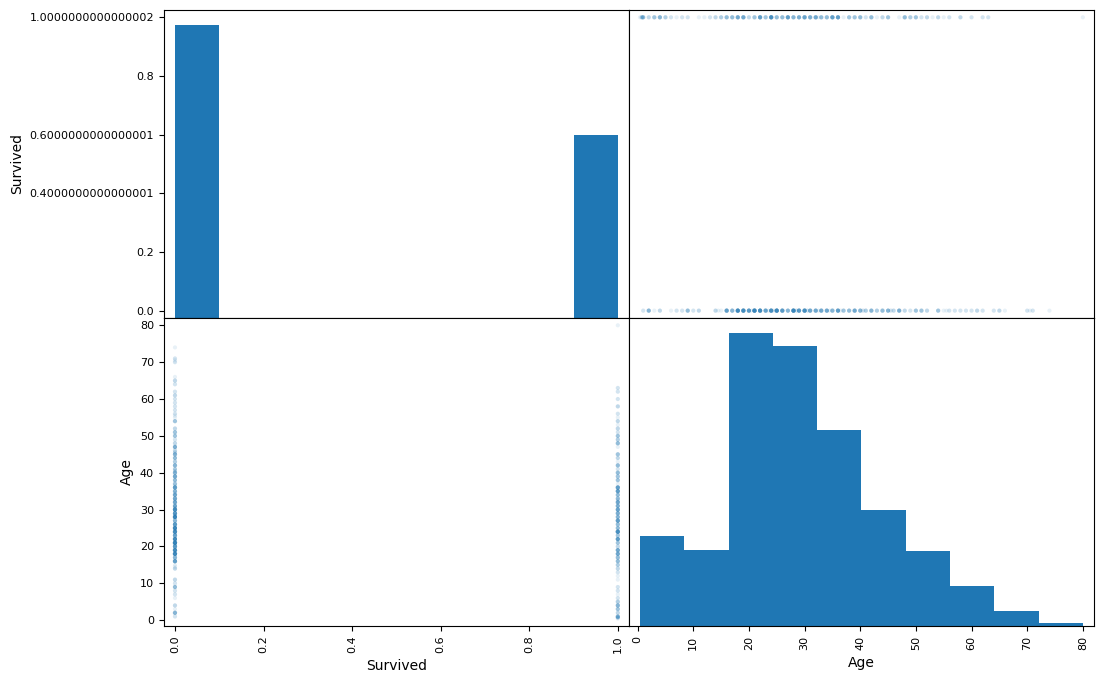

In [127]:
attributes = ["Survived", "Age"]
scatter_matrix(train[attributes], figsize=(12, 8), alpha=0.1);


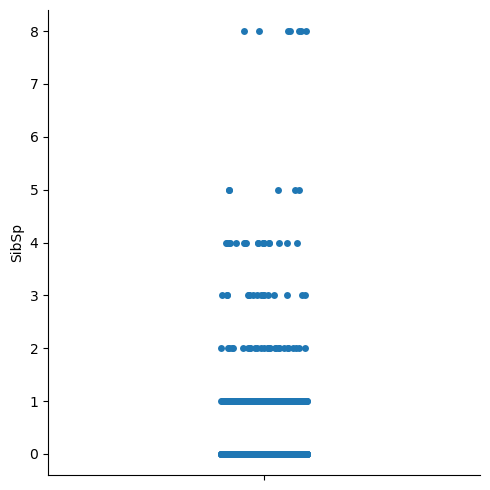

In [128]:
sns.catplot(train.SibSp)

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

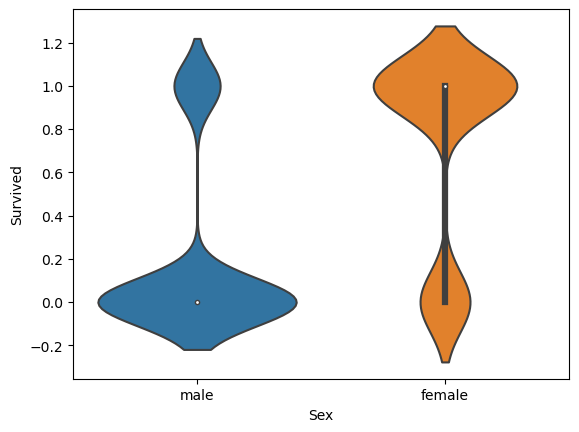

In [129]:
sns.violinplot(x=train.Sex,y=train.Survived)

<function matplotlib.pyplot.show(close=None, block=None)>

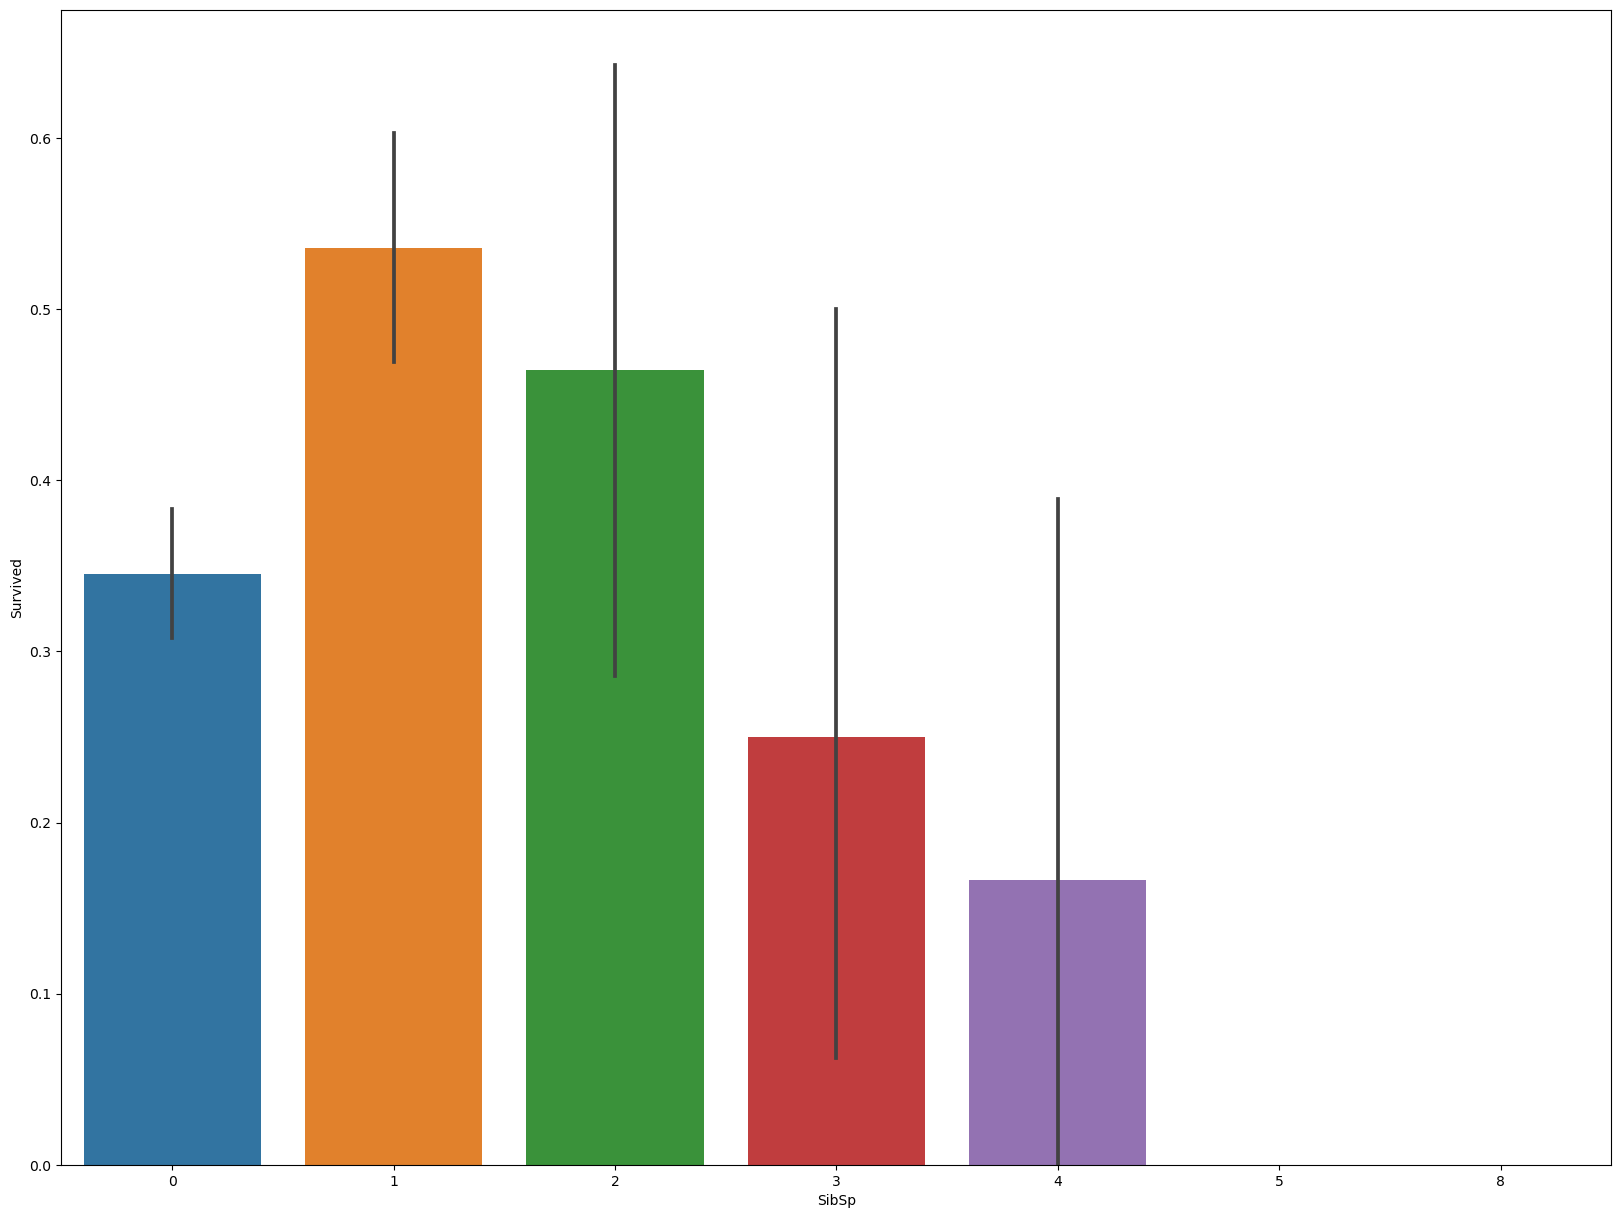

In [130]:
plt.figure(figsize=(20,15))
sns.barplot(x=train.SibSp,y=train.Survived)
plt.show

#### From these visualization we found that :
##### - Survives from females are more than males.age of survivs between 20 to 45.people with no families are more likley to survive than people with families

## Feature Enginerring

In [131]:
train.Embarked=train.Embarked.replace(['S','Q','C'],[0,1,2])
train.Sex=train.Sex.replace(['male','female'],[1,0])
test.Embarked=test.Embarked.replace(['S','Q','C'],[0,1,2])
test.Sex=test.Sex.replace(['male','female'],[1,0])

In [132]:
train.drop('PassengerId',axis=1,inplace=True)
test.drop('PassengerId',axis=1,inplace=True)

In [133]:
train=train.select_dtypes('number')
test=test.select_dtypes('number')

## Missing Values 

In [134]:
total=train.isnull().sum().sort_values(ascending=False)
percent1=train.isnull().sum()/train.isnull().count()*100
percent2=(round(percent1,1)).sort_values(ascending=False)
missing_data=pd.concat([total,percent2],axis=1,keys=['total','%'])
missing_data

,total,%
Age,177,19.9
Embarked,2,0.2
Survived,0,0.0
Pclass,0,0.0
Sex,0,0.0
SibSp,0,0.0
Parch,0,0.0
Fare,0,0.0


In [135]:
total=test.isnull().sum().sort_values(ascending=False)
percent1=test.isnull().sum()/test.isnull().count()*100
percent2=(round(percent1,1)).sort_values(ascending=False)
missing_data=pd.concat([total,percent2],axis=1,keys=['total','%'])
missing_data

,total,%
Age,86,20.6
Fare,1,0.2
Pclass,0,0.0
Sex,0,0.0
SibSp,0,0.0
Parch,0,0.0
Embarked,0,0.0


## Outliers

In [136]:
train.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,889.000000
mean,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208,0.464567
std,0.486592,0.836071,0.477990,14.526497,1.102743,0.806057,49.693429,0.792088
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


In [137]:
train.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,889.000000
mean,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208,0.464567
std,0.486592,0.836071,0.477990,14.526497,1.102743,0.806057,49.693429,0.792088
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


<AxesSubplot:xlabel='Age'>

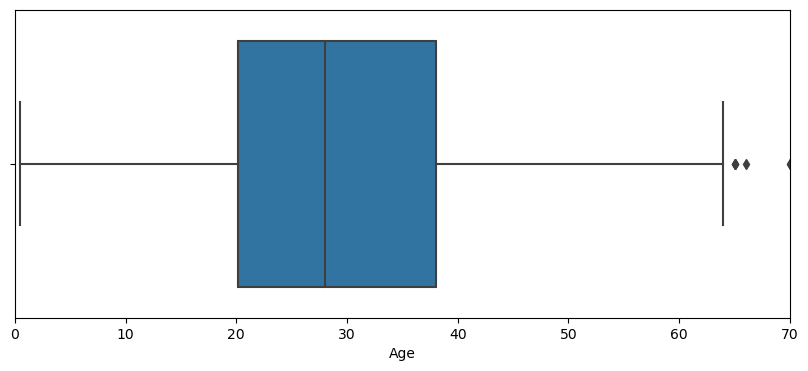

In [138]:
plt.figure(figsize=(10,4))
plt.xlim(0, 70)
sns.boxplot(x=train.Age)

<AxesSubplot:xlabel='Fare'>

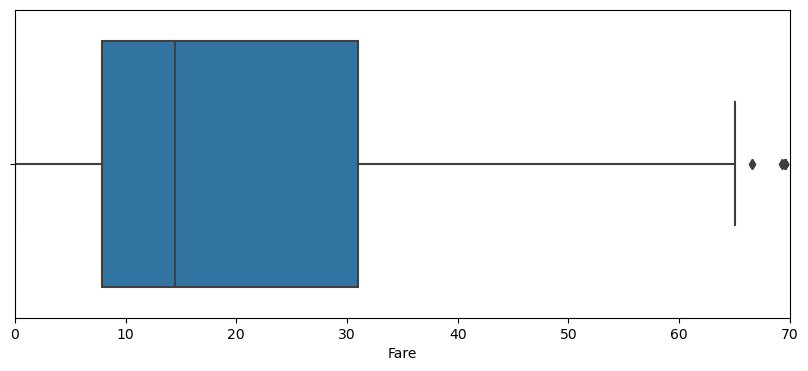

In [139]:
plt.figure(figsize=(10,4))
plt.xlim(0, 70)
sns.boxplot(x=train.Fare)

In [140]:
train['Age'] = train['Age'].where(train['Age'] <65)
train['Fare'] = train['Fare'].where(train['Fare'] <65)
test['Age'] = test['Age'].where(test['Age'] <65)
test['Fare'] = test['Fare'].where(test['Fare'] <65)

In [141]:
train=train.fillna(train.mean())
test=test.fillna(test.mean())

## Modeling 

In [142]:
from sklearn.model_selection import train_test_split,KFold
X=train.drop('Survived',axis=1)
y=train['Survived'].copy()
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

In [143]:

rf=HistGradientBoostingClassifier()
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)
accuracy_score(y_pred,y_test)

0.8547486033519553

In [144]:
rf.fit(X,y)
test['Survived']=rf.predict(test)

In [145]:
submission=pd.DataFrame({"PassengerId,":ID,"Survived":test["Survived"]})
submission.to_csv("my_submission.csv",index=False)